Spectral Clustering 

In [ ]:
import sys
import sklearn
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#train_dir = "/content/drive/MyDrive/USML_Project/photos"

train_dir = "/content/drive/MyDrive/USML_Project/Tim Pics, Metadata, and Code/Original"

In [ ]:
from keras.utils import image_dataset_from_directory
train_ds = image_dataset_from_directory(
  train_dir,
  shuffle=False,
  image_size=(128, 128))

Found 4998 files belonging to 10 classes.


In [ ]:
class_names = train_ds.class_names
img_name = train_ds.file_paths


In [ ]:
img_name[100]

'/content/drive/MyDrive/USML_Project/Tim Pics, Metadata, and Code/Original/Horses/27960473818_ae099cb2c8_b.jpg'

In [ ]:
class_names[1]

'Yosemite'

In [ ]:
x_train = []
y_train = []

for image_batch, labels_batch in train_ds:
    for i in image_batch:
        x_train.append(i)
    for i in labels_batch:
        y_train.append(i)

x_train = np.array(x_train)
y_train = np.array(y_train)
print(x_train.shape)
print(y_train.shape)


(4998, 128, 128, 3)
(4998,)


In [ ]:
X = x_train.reshape(len(x_train),-1)
Y = y_train
X = X.astype(float) / 255.

print(X.shape)
print(Y.shape)

(4998, 49152)
(4998,)


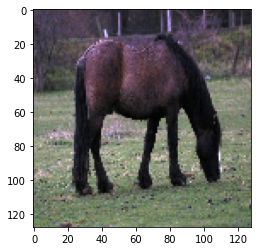

In [ ]:
num_clusters = 10
num_samples = 160 #2000
#data = X[np.random.choice(X.shape[0], num_samples), :]
data = X

num_clusters = 10

digit = X[0,:]
digit = np.reshape(digit, (128,128,3)) #(28,28))

plt.imshow(digit, cmap='Greys')

plt.show()

In [ ]:
import numpy.linalg as nla

# Gaussian kernel with variance sigma^2.
sigma = 100.0
def kernel(s_i, s_j):
    return np.exp(-nla.norm(s_i - s_j)**2.0 / (2.0*sigma**2.0))

# The kernel matrix of the data.
kernel_matrix = np.zeros((num_samples, num_samples))
for i in range(num_samples):
    for j in range(i, num_samples):
        kernel_matrix[i,j] = kernel(data[i,:], data[j,:])
        kernel_matrix[j,i] = kernel_matrix[i,j]
        
#plt.matshow(kernel_matrix)

In [ ]:
degrees = np.sum(kernel_matrix, axis=0)
D = np.diag(degrees)
K = kernel_matrix

L = D - K
L
#plt.matshow(L)

array([[124.68718407,  -0.73625725,  -0.65773783, ...,  -0.78546242,
         -0.7373109 ,  -0.71745422],
       [ -0.73625725, 111.10228745,  -0.73348442, ...,  -0.73571695,
         -0.65525522,  -0.67334654],
       [ -0.65773783,  -0.73348442,  99.84956875, ...,  -0.66452951,
         -0.56189469,  -0.63913756],
       ...,
       [ -0.78546242,  -0.73571695,  -0.66452951, ..., 112.84493489,
         -0.6972282 ,  -0.68902794],
       [ -0.7373109 ,  -0.65525522,  -0.56189469, ...,  -0.6972282 ,
        107.6657618 ,  -0.59387868],
       [ -0.71745422,  -0.67334654,  -0.63913756, ...,  -0.68902794,
         -0.59387868, 105.78498679]])

Smallest eigenvalues = [-4.54737564e-15  9.27314509e+01  9.55982373e+01  9.66688191e+01
  9.84492439e+01  9.99246494e+01  1.00405309e+02  1.01509278e+02
  1.02214706e+02  1.02469681e+02  1.02715800e+02  1.03195740e+02
  1.03476741e+02  1.04525558e+02  1.05727426e+02  1.06412109e+02
  1.07858845e+02  1.08345096e+02  1.08479942e+02  1.08612075e+02]


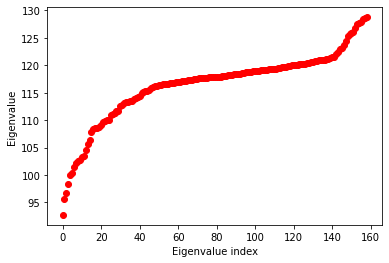

In [ ]:
import numpy.linalg as nla

(eigvals, eigvecs) = nla.eigh(L)

print('Smallest eigenvalues = {}'.format(eigvals[0:2*num_clusters]))

plt.plot(eigvals[1:], 'ro')
plt.xlabel('Eigenvalue index')
plt.ylabel('Eigenvalue')

plt.show()

In [ ]:
from sklearn.cluster import KMeans, SpectralClustering

sigma = 500.0

# spectral clustering
sc = SpectralClustering(n_clusters=10, gamma=1.0/sigma**2.0, affinity='rbf', n_init=100, random_state=0, assign_labels='kmeans').fit(data)

skl_sc_clusters_info = []
for ind_cluster in range(10):
    skl_sc_clusters_info.append([])

for ind_point in range(num_samples):
    ind_cluster = sc.labels_[ind_point]
    skl_sc_clusters_info[ind_cluster].append(ind_point)

In [ ]:
sc.labels_, skl_sc_clusters_info[0][0]

(array([0, 6, 6, ..., 3, 3, 2], dtype=int32), 0)

In [ ]:
sc.labels_[0]

0

Texual imputs

In [ ]:
img_name[100]

'/content/drive/MyDrive/USML_Project/Tim Pics, Metadata, and Code/Original/Horses/27960473818_ae099cb2c8_b.jpg'

In [ ]:
ids = []
tags = []
for i in range(len(img_name)):
  count = 0
  start = 0
  while count < 7:
    if img_name[i][start] == "/":
      count +=1
    start +=1
    tag = ""
  while count < 8:
    if img_name[i][start] == "/":
      count +=1
      start +=1
    else:
      tag = tag + img_name[i][start]
      start +=1

  tags.append(tag.lower())

  id = ""
  while count < 9:
    if img_name[i][start] == "_":
      count +=1
      start +=1
    else:
      id = id + img_name[i][start]
      start +=1
  
  ids.append(id)


In [ ]:
import pandas as pd

data1 = pd.read_csv("/content/drive/MyDrive/USML_Project/Tim Pics, Metadata, and Code/tim_pics_metadata.csv")
data2 = pd.read_csv("/content/drive/MyDrive/USML_Project/Tim Pics, Metadata, and Code/tim_pics_metadata2.csv")

metadata = pd.concat([data1, data2])

In [ ]:
id_index = {}

for i in range(len(metadata)):
  temp = str(int(metadata.iloc[i]['id']))
  if temp not in id_index:
    id_index[temp] = i

In [ ]:
for i in range(len(ids)):
  if ids[i] not in id_index:
    print(i)

8
9
260
334
335
1519
1520
1671
1830
1831
1850
1882
2534
2561
2775
2907
2947


In [ ]:
#id_index[ids[8]] = 5083
#id_index[ids[9]] = 5470
#id_index[ids[319]] = 10373 
#id_index[ids[320]] = 10374
#id_index[ids[534]] = 7995
#id_index[ids[561]] = 7958

id_index[ids[8]] = 5472
id_index[ids[9]] = 5470
id_index[ids[260]] = 5901
id_index[ids[334]] = 6155
id_index[ids[335]] = 5660
id_index[ids[1519]] = 10373
id_index[ids[1520]] = 10374
id_index[ids[1671]] = 10309
id_index[ids[1830]] = 10748
id_index[ids[1831]] = 10749
id_index[ids[1850]] = 11999
id_index[ids[1882]] = 11587
id_index[ids[2534]] = 7995
id_index[ids[2561]] = 7958
id_index[ids[2775]] = 7230
id_index[ids[2907]] = 6836
id_index[ids[2947]] = 6937


In [ ]:
for i in range(len(ids)):
  if ids[i] not in id_index:
    print(i)

In [ ]:
def texual(tag):
  tag = tag.lower()
  match = [0,0,0,0,0,0,0,0,0,0]
  total = [0,0,0,0,0,0,0,0,0,0]
  for i in range(len(sc.labels_)):
    total[sc.labels_[i]] += 1
    if tags[i] == tag:
      match[sc.labels_[i]] += 1
  perc = []
  for i in range(10):
    perc.append(match[i]/total[i])
  max = 0
  clust = 0
  for i in range(10):
    if match[i] > max:
      max = match[i]
      clust = i
  views = []
  imgs = []
  for i in range(len(sc.labels_)):
    if sc.labels_[i] == clust and tags[i] == tag:
      imgs.append(i)
      views.append(metadata.iloc[id_index[ids[i]]]['count_views'])
  

  most = [x for _, x in sorted(zip(views, imgs), reverse=True)]


  #most = most[:10]


  return most



In [ ]:
def pics_with_unique_authors(tag):
  most = texual(tag)
  pics = []
  auth = {}
  i=0
  while len(pics)<10:
    if metadata.iloc[id_index[ids[most[i]]]]['owner'] not in auth:
      pics.append(most[i])
      auth[metadata.iloc[id_index[ids[most[i]]]]['owner']] = 1
    i +=1
  #for i in range(10):
    #print(metadata.iloc[id_index[ids[most[i]]]]['owner'])
  return pics

In [ ]:
def get_top_images(tag):

  most = pics_with_unique_authors(tag)

  plt.figure(figsize=(10 * 5, 15))

  for idx in range(10):
    plt.subplot(2, 10/2, idx+1)
    digit = X[most[idx],:]
    digit = np.reshape(digit, (128,128,3)) #(28,28))
    imgplot = plt.imshow(digit)
    # plt.show()
    plt.axis('off')
  plt.suptitle("Top " + tag.title() + " Images", fontsize=80)



In [ ]:
get_top_images("canyon")

In [ ]:
get_top_images("castle")


In [ ]:
get_top_images("coast")


In [ ]:
get_top_images("fish")


In [ ]:
get_top_images("flower")


In [ ]:
get_top_images("horses")


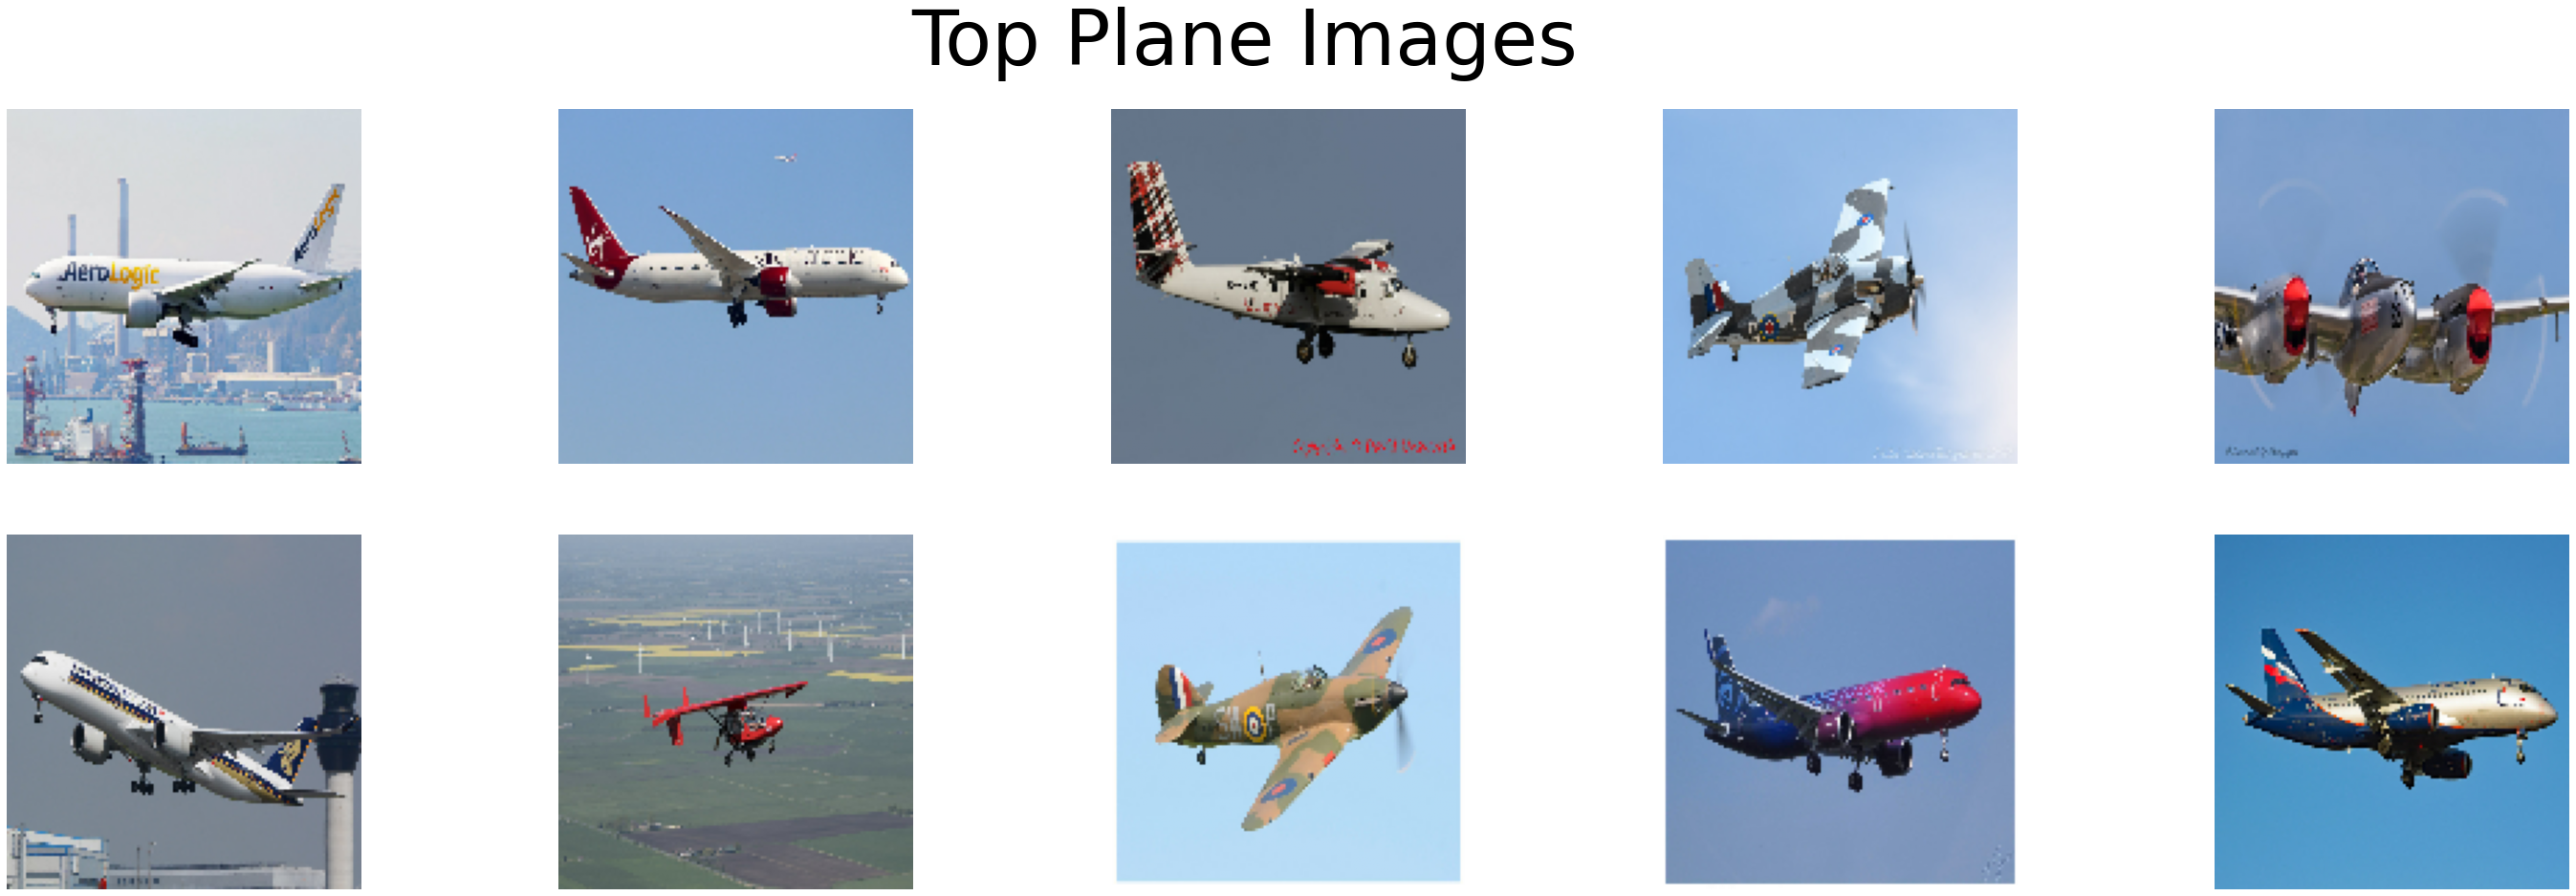

In [ ]:
get_top_images("plane")
  

In [ ]:
get_top_images("skyline")
  

In [ ]:
get_top_images("sunset")
  

In [ ]:
get_top_images("yosemite")


Above shows the best images for each topic by first finding the cluster that has the highest percentage of images with the requested tag, and then returns the images with the tags and the most views. This is similar to how flickrs querying system actually works, except instead of specral clustering they use a complex neural network to cluster images. It is very difficult to quantify the performance of such a task as it is subjective what the "best" images in a certain tag are, but the results do seem to have filtered out noise images and only returned quality images. Whether they are the "most" quality images in their respective tags is subjective

In [ ]:
import random
def texual_test(tag):
  random.seed(1)
  tag = tag.lower()
  temp_tag = []
  match = [0,0,0,0,0,0,0,0,0,0]
  total = [0,0,0,0,0,0,0,0,0,0]
  for i in range(len(sc.labels_)):
    choices = [0,0,0,0,0,0,0,0,0,1]
    x = random.choice(choices)
    total[sc.labels_[i]] += 1
    if tags[i] == tag:
      match[sc.labels_[i]] += 1
      temp_tag.append(tags[i])
    elif x == 1:
      temp_tag.append(tag)
      match[sc.labels_[i]] += 1
    else:
      temp_tag.append(tags[i])
  perc = []
  for i in range(10):
    perc.append(match[i]/total[i])
  max = 0
  clust = 0
  for i in range(10):
    if match[i] > max:
      max = match[i]
      clust = i
    
  views = []
  imgs = []
  for i in range(len(sc.labels_)):
    if sc.labels_[i] == clust: 
      if temp_tag[i] == tag:
        imgs.append(i)
        views.append(metadata.iloc[id_index[ids[i]]]['count_views'])

  most = [x for _, x in sorted(zip(views, imgs), reverse=True)]


  #most = most[:10]


  return most



In [ ]:
def pics_with_unique_authors2(tag):
  most = texual_test(tag)
  pics = []
  auth = {}
  i=0
  while len(pics)<10:
    if metadata.iloc[id_index[ids[most[i]]]]['owner'] not in auth:
      pics.append(most[i])
      auth[metadata.iloc[id_index[ids[most[i]]]]['owner']] = 1
    i +=1
  #for i in range(10):
    #print(metadata.iloc[id_index[ids[most[i]]]]['owner'])
  return pics

In [ ]:
def get_top_images2(tag):

  most = texual_test(tag)

  plt.figure(figsize=(10 * 5, 15))

  for idx in range(10):
    plt.subplot(2, 10/2, idx+1)
    digit = X[most[idx],:]
    digit = np.reshape(digit, (128,128,3)) #(28,28))
    imgplot = plt.imshow(digit)
    # plt.show()
    plt.axis('off')
  plt.suptitle("Top " + tag.title() + " Images w/ Noise", fontsize=80)

  count = 0
  for i in range(10):
    if tags[most[i]] != tag:
      count+=1
  print((10-count)/10)



In [ ]:
get_top_images2("canyon")

In [ ]:
get_top_images2("castle")


In [ ]:
get_top_images2("coast")


In [ ]:
get_top_images2("fish")


In [ ]:
get_top_images2("flower")


In [ ]:
get_top_images2("horses")


0.8


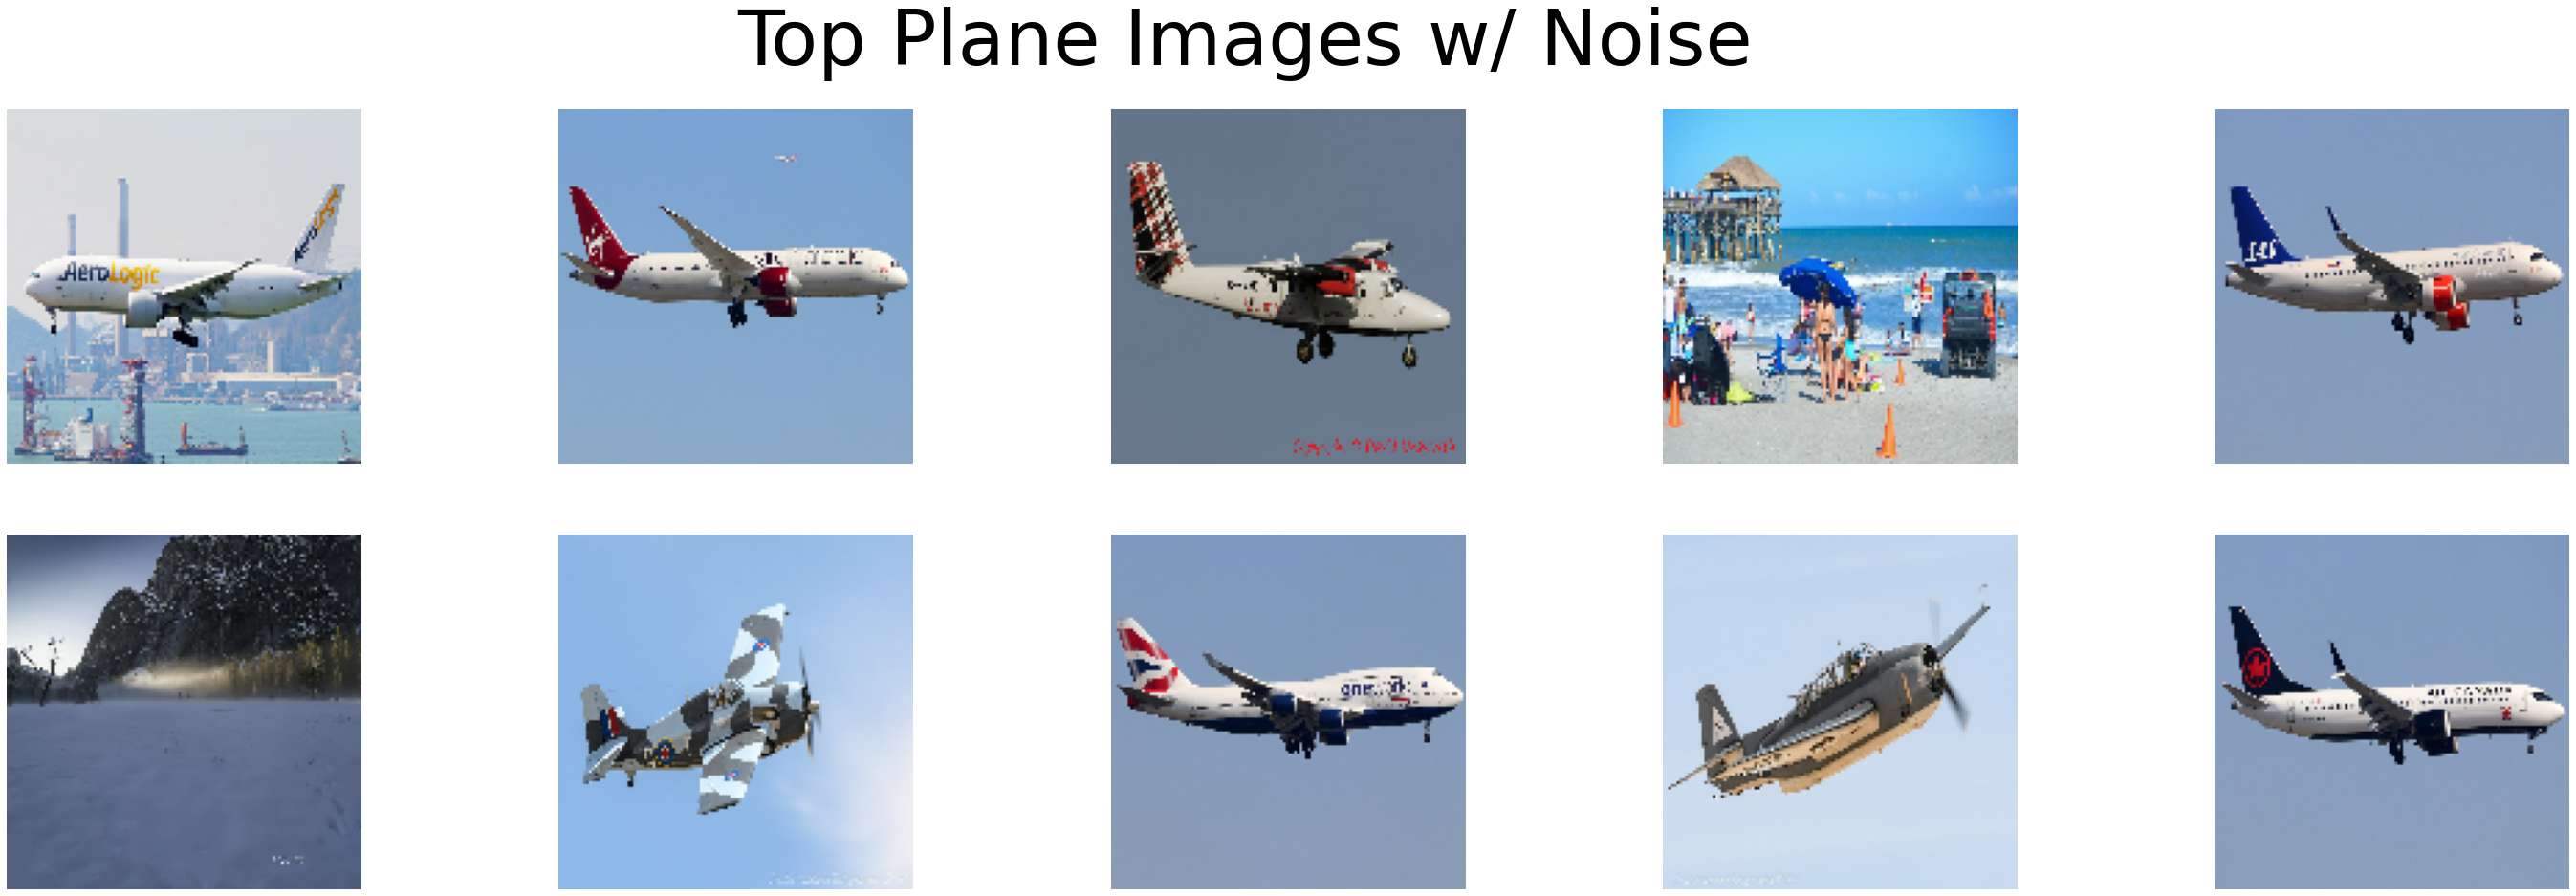

In [ ]:
get_top_images2("plane")


0.6


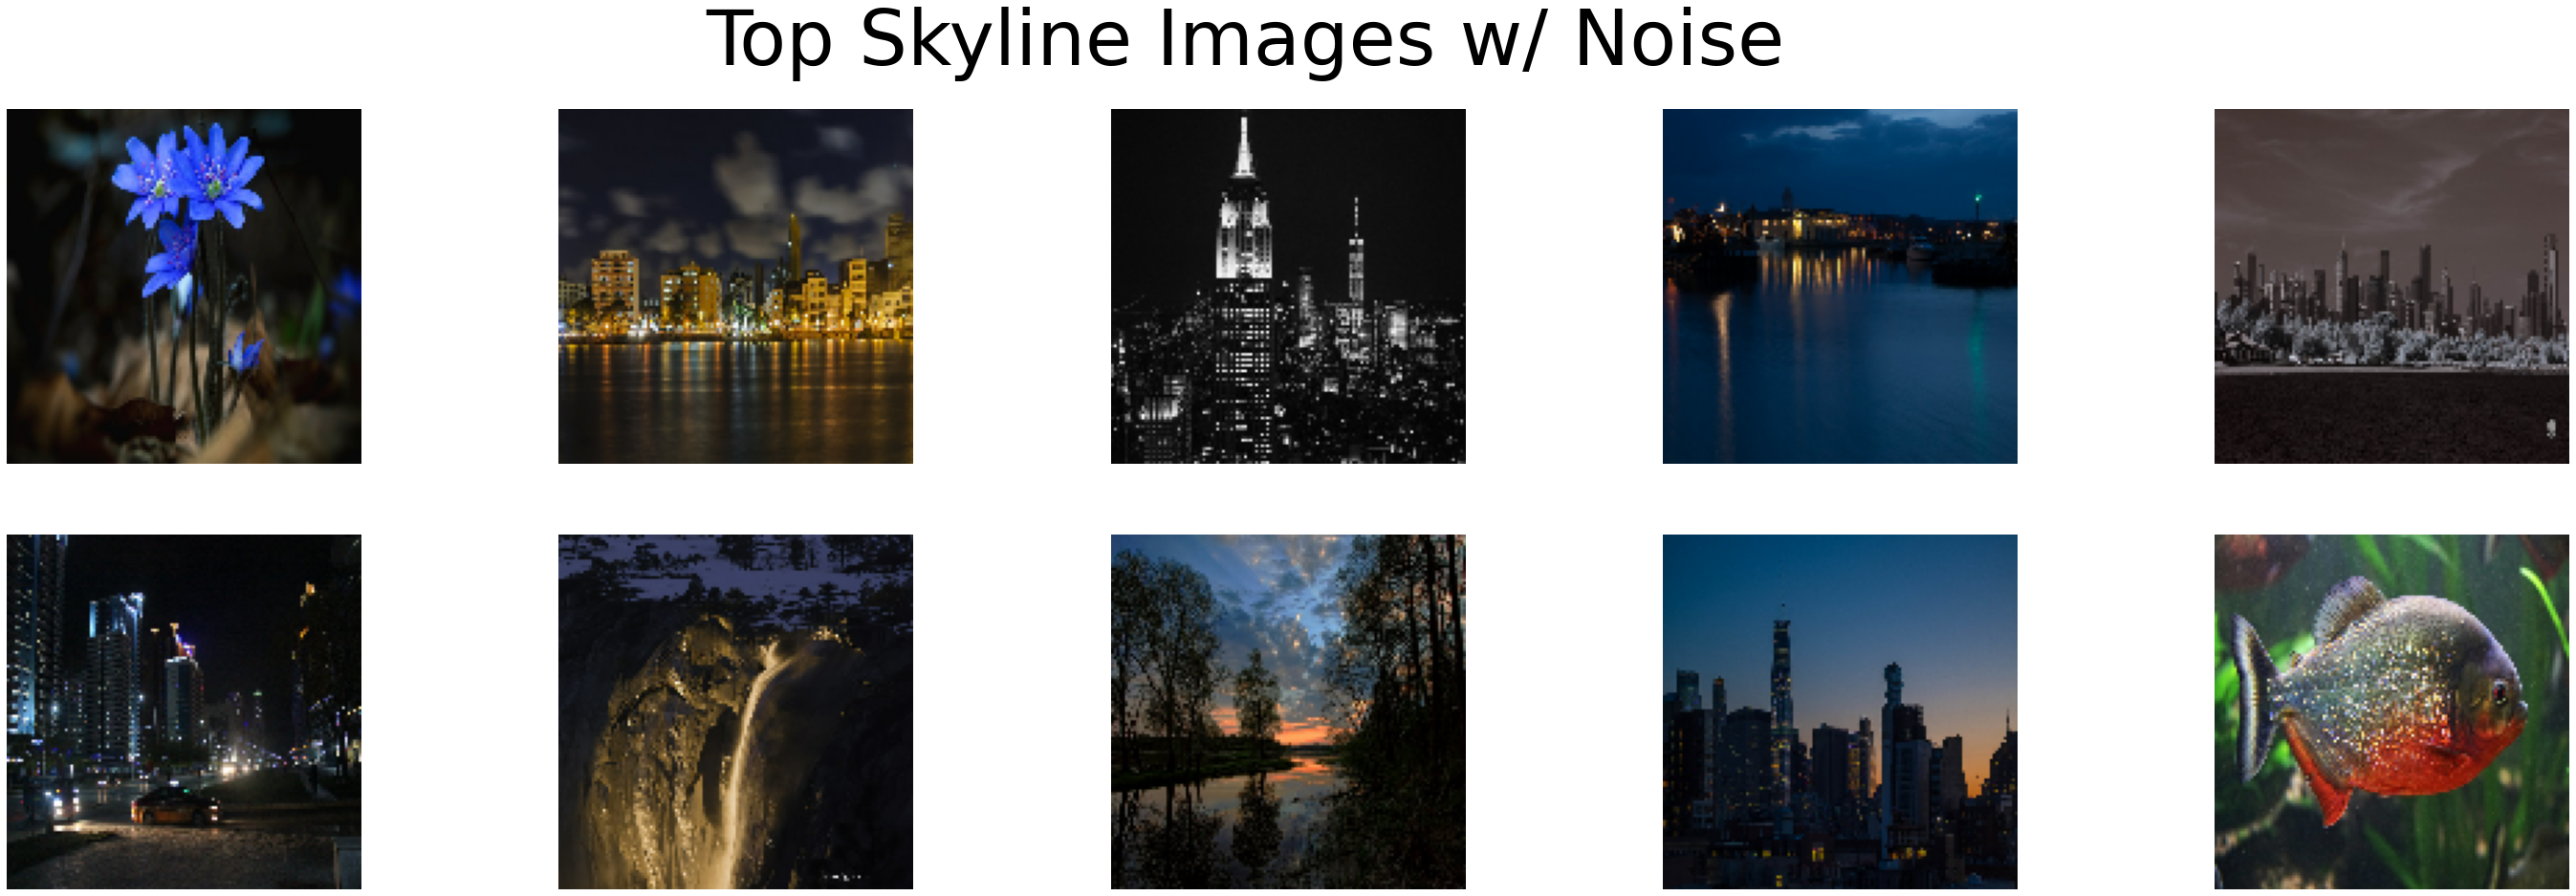

In [ ]:
get_top_images2("skyline")


In [ ]:
get_top_images2("sunset")


In [ ]:
get_top_images2("yosemite")


In [ ]:
def avg_views(tag):
  count = 0
  sum = 0
  for i in range(len(tags)):
    if tags[i]==tag:
      sum += metadata.iloc[id_index[ids[i]]]['count_views']
      count +=1
  print("Average Views for", tag +":", (sum/count))

In [ ]:
x = ["canyon", "castle", "coast", "fish", "flower", "horses", "plane", "skyline", "sunset", "yosemite"]

for i in x:
  avg_views(i)

Average Views for canyon: 130.674
Average Views for castle: 662.422
Average Views for coast: 923.262
Average Views for fish: 766.83
Average Views for flower: 506.6112224448898
Average Views for horses: 330.74
Average Views for plane: 713.0360721442886
Average Views for skyline: 783.624
Average Views for sunset: 981.846
Average Views for yosemite: 620.29


In [ ]:
import numpy as np
def perc_views(tag, perc):
  views = []
  for i in range(len(tags)):
    if tags[i]==tag:
      views.append(metadata.iloc[id_index[ids[i]]]['count_views'])
  print(str(perc)+"th percentile Views for", tag +":", np.percentile(views, perc))

In [ ]:
x = ["canyon", "castle", "coast", "fish", "flower", "horses", "plane", "skyline", "sunset", "yosemite"]

for i in x:
  perc_views(i, 90)


90th percentile Views for canyon: 200.20000000000005
90th percentile Views for castle: 1391.3000000000002
90th percentile Views for coast: 2387.5
90th percentile Views for fish: 1731.2
90th percentile Views for flower: 1298.3999999999999
90th percentile Views for horses: 517.1
90th percentile Views for plane: 1254.2
90th percentile Views for skyline: 1711.9000000000005
90th percentile Views for sunset: 2037.2000000000003
90th percentile Views for yosemite: 847.8000000000009


In [ ]:
avg_view = {}
avg_view["canyon"] = 131
avg_view["castle"] = 662
avg_view["coast"] = 923
avg_view["fish"] = 767
avg_view["flower"] = 507
avg_view["horses"] = 331
avg_view["plane"] = 713
avg_view["skyline"] = 784
avg_view["sunset"] = 982
avg_view["yosemite"] = 620

perc_view = {}
perc_view["canyon"] = 200
perc_view["castle"] = 1391
perc_view["coast"] = 2387
perc_view["fish"] = 1731
perc_view["flower"] = 1298
perc_view["horses"] = 517
perc_view["plane"] = 1254
perc_view["skyline"] = 1711
perc_view["sunset"] = 2037
perc_view["yosemite"] = 847

In [ ]:
import random
def texual_test2(tag):
  random.seed(1)
  tag = tag.lower()
  temp_tag = []
  match = [0,0,0,0,0,0,0,0,0,0]
  total = [0,0,0,0,0,0,0,0,0,0]
  for i in range(len(sc.labels_)):
    choices = [0,0,0,0,0,0,0,0,0,1]
    x = random.choice(choices)
    total[sc.labels_[i]] += 1
    if tags[i] == tag:
      match[sc.labels_[i]] += 1
      temp_tag.append(tags[i])
    elif x == 1:
      temp_tag.append(tag)
      match[sc.labels_[i]] += 1
    else:
      temp_tag.append(tags[i])
  perc = []
  for i in range(10):
    perc.append(match[i]/total[i])
  max = 0
  clust = 0
  for i in range(10):
    if match[i] > max:
      max = match[i]
      clust = i
    
  views = []
  imgs = []
  for i in range(len(sc.labels_)):
    if sc.labels_[i] == clust: 
      if temp_tag[i] == tag:
        imgs.append(i)
        if tags[i] == tag:
          views.append(metadata.iloc[id_index[ids[i]]]['count_views'])
        else:
          views.append(perc_view[tag])

  most = [x for _, x in sorted(zip(views, imgs), reverse=True)]


  #most = most[:10]


  return most
def pics_with_unique_authors3(tag):
  most = texual_test2(tag)
  pics = []
  auth = {}
  i=0
  while len(pics)<10:
    if metadata.iloc[id_index[ids[most[i]]]]['owner'] not in auth:
      pics.append(most[i])
      auth[metadata.iloc[id_index[ids[most[i]]]]['owner']] = 1
    i +=1
  #for i in range(10):
    #print(metadata.iloc[id_index[ids[most[i]]]]['owner'])
  return pics

def get_top_images3(tag):

  most = pics_with_unique_authors3(tag)

  plt.figure(figsize=(10 * 5, 15))

  for idx in range(10):
    plt.subplot(2, 10/2, idx+1)
    digit = X[most[idx],:]
    digit = np.reshape(digit, (128,128,3)) #(28,28))
    imgplot = plt.imshow(digit)
    # plt.show()
    plt.axis('off')
  plt.suptitle("Top " + tag.title() + " Images w/ Noise of adj. views", fontsize=80)

  count = 0
  for i in range(10):
    if tags[most[i]] != tag:
      count+=1
  print((10-count)/10)

In [ ]:
get_top_images3("canyon")

In [ ]:
get_top_images3("castle")

In [ ]:
get_top_images3("coast")

In [ ]:
get_top_images3("fish")

In [ ]:
get_top_images3("flower")

In [ ]:
get_top_images3("horses")

1.0


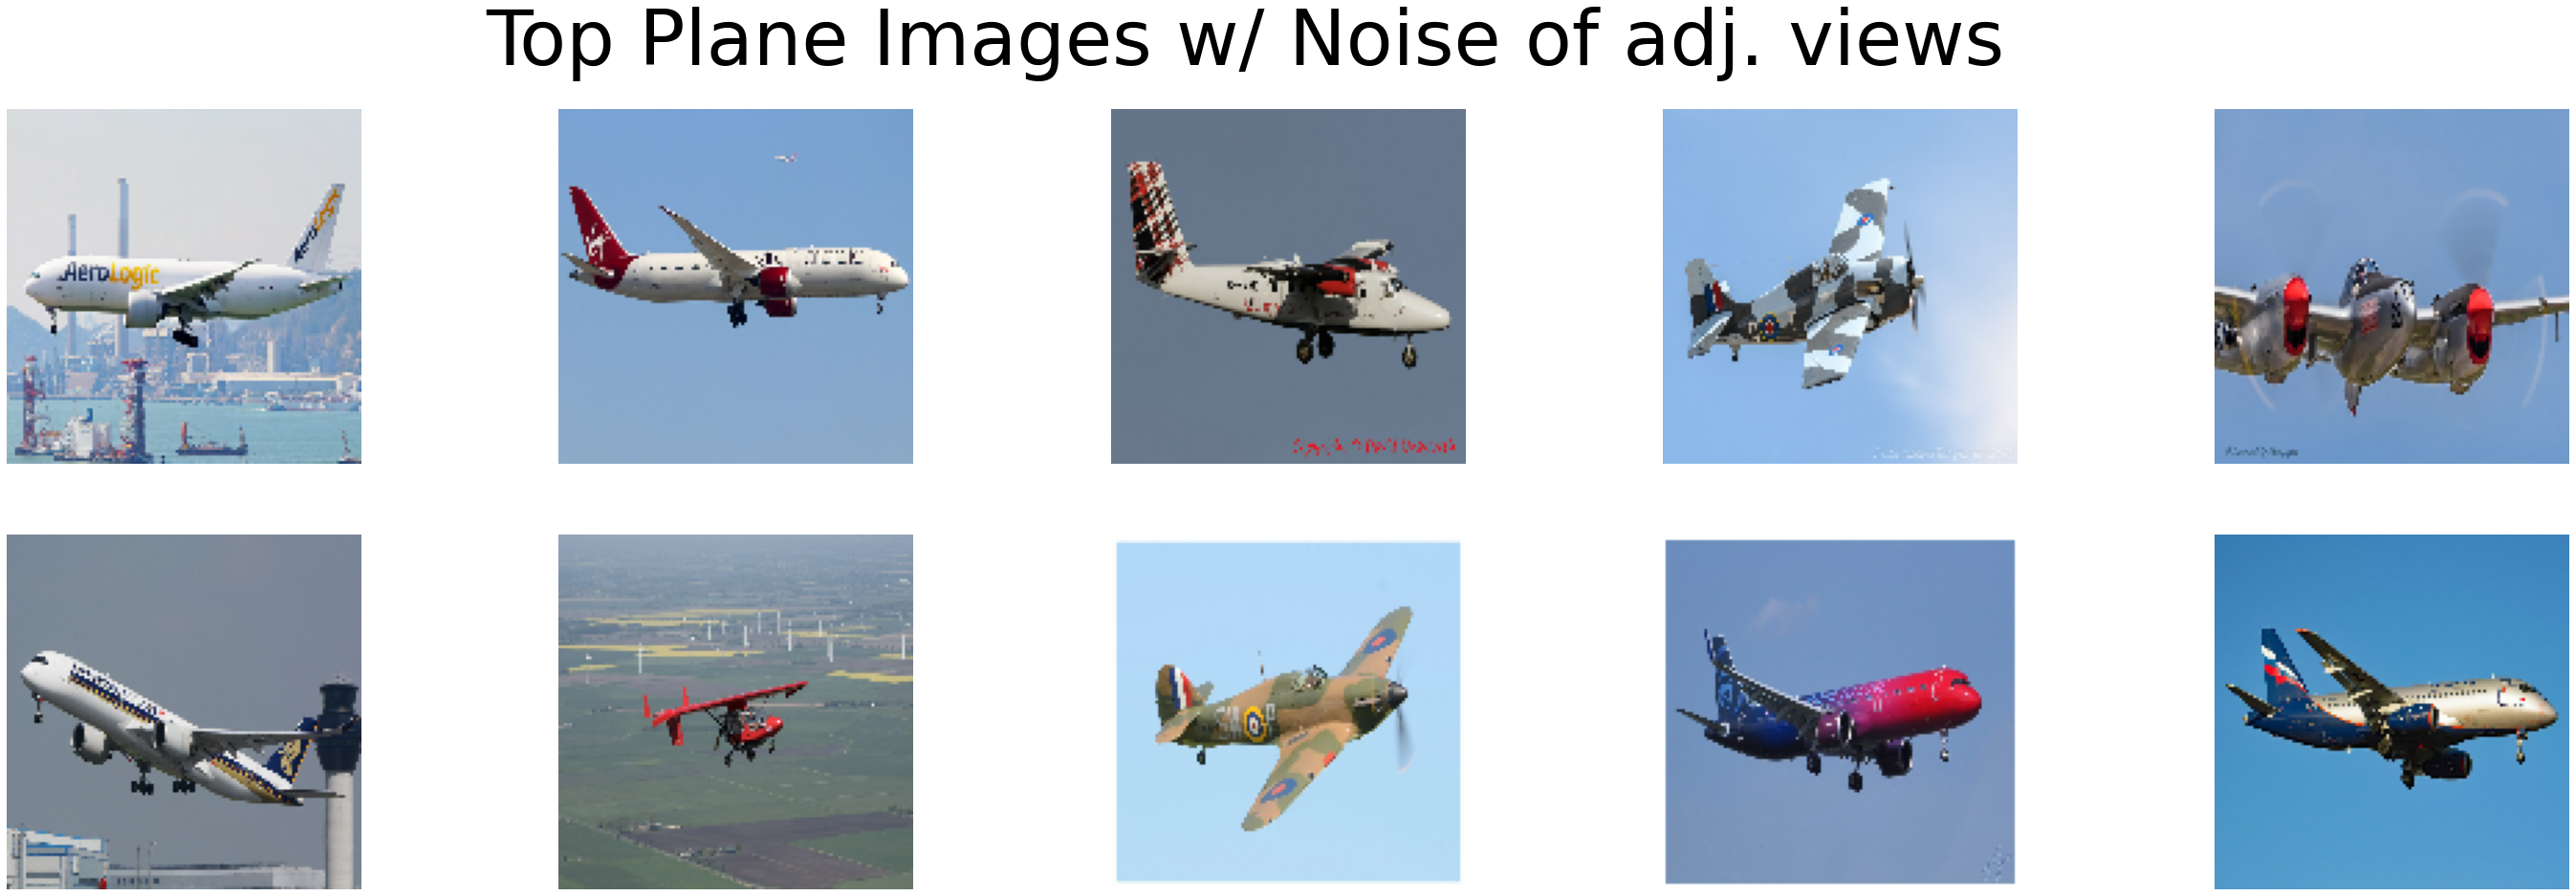

In [ ]:
get_top_images3("plane")

In [ ]:
get_top_images3("skyline")

In [ ]:
get_top_images3("sunset")

In [ ]:
get_top_images3("yosemite")